In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely.geometry import Point

# for qqplot
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
# for adding some text in plot
from matplotlib.offsetbox import AnchoredText

# for train test split, for cross validation, and for measure
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.metrics import mean_squared_error as MSE
# for data standard scaler
from sklearn.preprocessing import StandardScaler

# for Multiple linear regression
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

# for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [2]:
import libpysal
import mgwr
import esda
from mgwr.gwr import GWR, MGWR
from matplotlib import colors
import spreg

# MSOA shapefile data

In [3]:
msoa_ew_shp_url = "https://github.com/ShengAric92/CASA0010_dissertation/raw/main/MSOA_data/shapefile/England/MSOA_EngWal_Dec_2011_Generalised_ClippedEW_0/Middle_Layer_Super_Output_Areas_December_2011_Generalised_Clipped_Boundaries_in_England_and_Wales.shp"
msoa_ew_shp = gpd.read_file(msoa_ew_shp_url)

In [4]:
msoa_england_shp = msoa_ew_shp[msoa_ew_shp['msoa11cd'].str.startswith("E")]

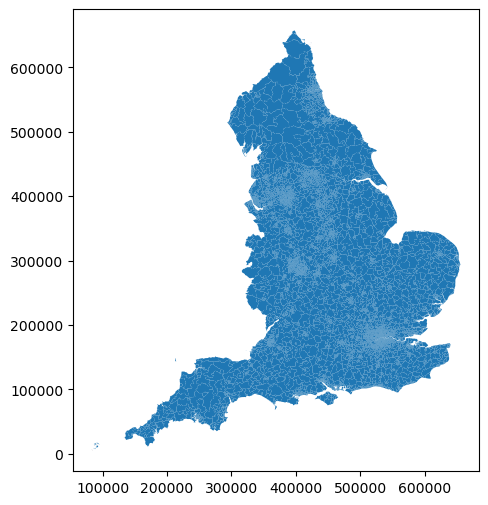

In [5]:
f, axes = plt.subplots(1, 1, figsize=(6, 6))
msoa_england_shp.plot(ax=axes)
plt.show()

# Load data set

In [6]:
Vardata_url = "https://github.com/ShengAric92/CASA0010_dissertation/raw/main/MSOA_data/All_msoa_data/msoa_all_data.csv"
Vardata = pd.read_csv(Vardata_url)

In [7]:
Vardata

MSOA11CD      Asian      Black     Mixed      White     Other  \
0     E02000001  16.833644   2.702703  5.475303  69.373253  5.615098   
1     E02000002  22.253079  20.973195  4.926346  48.816711  3.030669   
2     E02000003  34.945398  15.600624  4.194834  40.665627  4.593517   
3     E02000004  15.853659  14.242698  3.703704  62.857573  3.342367   
4     E02000005  30.078513  17.660861  4.304666  44.373252  3.582709   
...         ...        ...        ...       ...        ...       ...   
6786  E02004879   2.231828   1.579040  1.821630  93.754411  0.613091   
6787  E02004938   6.893250   2.345620  4.467847  84.538056  1.755226   
6788  E02004947   5.436471   4.473439  2.593973  86.393290  1.102827   
6789  E02004993   6.669373   3.984225  4.395987  83.048193  1.902221   
6790  E02005732   0.683793   0.332311  0.862730  97.814417  0.306748   

         Female  Popudensity   Age17_29   Age30_39  ...  Childrenemerg  \
0     44.122799    37.333939  31.040841  22.964875  ...           54.7   
1     52.981870    38.713840  15.422233  15.338740  ...           63.8   
2     50.537999    55.062478  17.368466  16.716089  ...           68.0   
3     50.698690    27.587974  16.622999  14.454148  ...           60.5   
4     51.711027    93.122466  15.743255  16.250226  ...           74.7   
...         ...          ...        ...        ...  ...            ...   
6786  50.664710     1.143445  12.195990  10.728736  ...          145.5   
6787  49.387155     2.729283  12.779866   9.805524  ...          130.5   
6788  50.574170    24.873263  13.669970  13.260972  ...          163.5   
6789  51.444785     7.630201  15.681279  12.357403  ...          153.5   
6790  52.264698     0.424825  10.352006   9.967197  ...          104.8   

      Alcohol    HighSSB  COPDprev  OBprev   IMDscore  IMDrank  IMDdecile  \
0        71.4  11.617112      0.48    3.35  14.720484   4198.0          7   
1       110.1  12.923564      1.35   12.49  34.767560   1060.0          2   
2        81.8  12.904267      1.06   12.29  25.149726   2197.0          4   
3        85.9  12.772685      1.40   14.72  23.560044   2427.0          4   
4        98.2  13.643012      1.43   13.48  30.212965   1519.0          3   
...       ...        ...       ...     ...        ...      ...        ...   
6786     69.9   9.120499      1.36    9.19  10.609856   5369.0          8   
6787    103.1  10.942021      1.26    8.85  12.763478   4749.0          7   
6788     69.6  10.686081      1.52    9.63   9.054816   5803.0          9   
6789     88.8  12.311359      1.12    8.14  14.594417   4239.0          7   
6790     79.9   7.581574      1.81   11.85   9.067768   5800.0          9   

      IMDquintile  DMprev  
0               4    2.74  
1               1    9.58  
2               2    9.61  
3               2    8.98  
4               2    9.26  
...           ...     ...  
6786            4    6.12  
6787            4    5.46  
6788            5    6.98  
6789            4    5.05  
6790            5    6.11  

[6791 rows x 25 columns]

## Merge with shapefile

In [8]:
Varshp = pd.merge(msoa_england_shp, Vardata, how='left', left_on='msoa11cd', right_on='MSOA11CD')

In [9]:
Varshp.iloc[:, 7:]

MSOA11CD      Asian      Black     Mixed      White     Other  \
0     E02000001  16.833644   2.702703  5.475303  69.373253  5.615098   
1     E02000002  22.253079  20.973195  4.926346  48.816711  3.030669   
2     E02000003  34.945398  15.600624  4.194834  40.665627  4.593517   
3     E02000004  15.853659  14.242698  3.703704  62.857573  3.342367   
4     E02000005  30.078513  17.660861  4.304666  44.373252  3.582709   
...         ...        ...        ...       ...        ...       ...   
6786  E02006930  10.751269  13.126904  6.680203  65.837563  3.604061   
6787  E02006931   8.286650  15.526900  6.828031  66.515168  2.843251   
6788  E02006932  14.660723   3.452912  3.877450  73.438053  4.570863   
6789  E02006933   7.158651   2.183527  4.574350  79.906025  6.177446   
6790  E02006934   8.215892   2.128936  3.823088  78.410795  7.421289   

         Female  Popudensity   Age17_29   Age30_39  ...  Childrenemerg  \
0     44.122799    37.333939  31.040841  22.964875  ...           54.7   
1     52.981870    38.713840  15.422233  15.338740  ...           63.8   
2     50.537999    55.062478  17.368466  16.716089  ...           68.0   
3     50.698690    27.587974  16.622999  14.454148  ...           60.5   
4     51.711027    93.122466  15.743255  16.250226  ...           74.7   
...         ...          ...        ...        ...  ...            ...   
6786  49.422906   116.801435  20.410378  25.984019  ...          145.9   
6787  50.596585    48.951460  19.965028  20.294178  ...          104.8   
6788  50.471124   106.105251  82.635728   9.903211  ...           77.8   
6789  49.001191    46.487813  46.011377  20.108480  ...          215.5   
6790  44.555796    56.549543  56.473456  21.208017  ...          177.2   

      Alcohol    HighSSB  COPDprev  OBprev   IMDscore  IMDrank  IMDdecile  \
0        71.4  11.617112      0.48    3.35  14.720484   4198.0          7   
1       110.1  12.923564      1.35   12.49  34.767560   1060.0          2   
2        81.8  12.904267      1.06   12.29  25.149726   2197.0          4   
3        85.9  12.772685      1.40   14.72  23.560044   2427.0          4   
4        98.2  13.643012      1.43   13.48  30.212965   1519.0          3   
...       ...        ...       ...     ...        ...      ...        ...   
6786     82.6  14.441009      0.95    7.31  20.582796   2936.0          5   
6787     85.2  12.911827      0.89    6.74  19.135968   3217.0          5   
6788    119.9  28.914023      1.11    5.09  24.361924   2312.0          4   
6789    102.5  19.586924      1.65    6.88  28.382367   1737.0          3   
6790    174.2  23.216107      1.43    6.26  20.698880   2910.0          5   

      IMDquintile  DMprev  
0               4    2.74  
1               1    9.58  
2               2    9.61  
3               2    8.98  
4               2    9.26  
...           ...     ...  
6786            3    4.08  
6787            3    5.55  
6788            2    1.82  
6789            2    3.09  
6790            3    2.44  

[6791 rows x 25 columns]

In [10]:
# data without IMD, but with IMDdecile
Varshp2 = Varshp.drop(columns = ['IMDscore', 'IMDrank', 'IMDquintile'])

In [11]:
# data without IMD
Varshp3 = Varshp.drop(columns = ['IMDscore', 'IMDrank', 'IMDdecile', 'IMDquintile'])

# Data distribution

## Data histogram plot

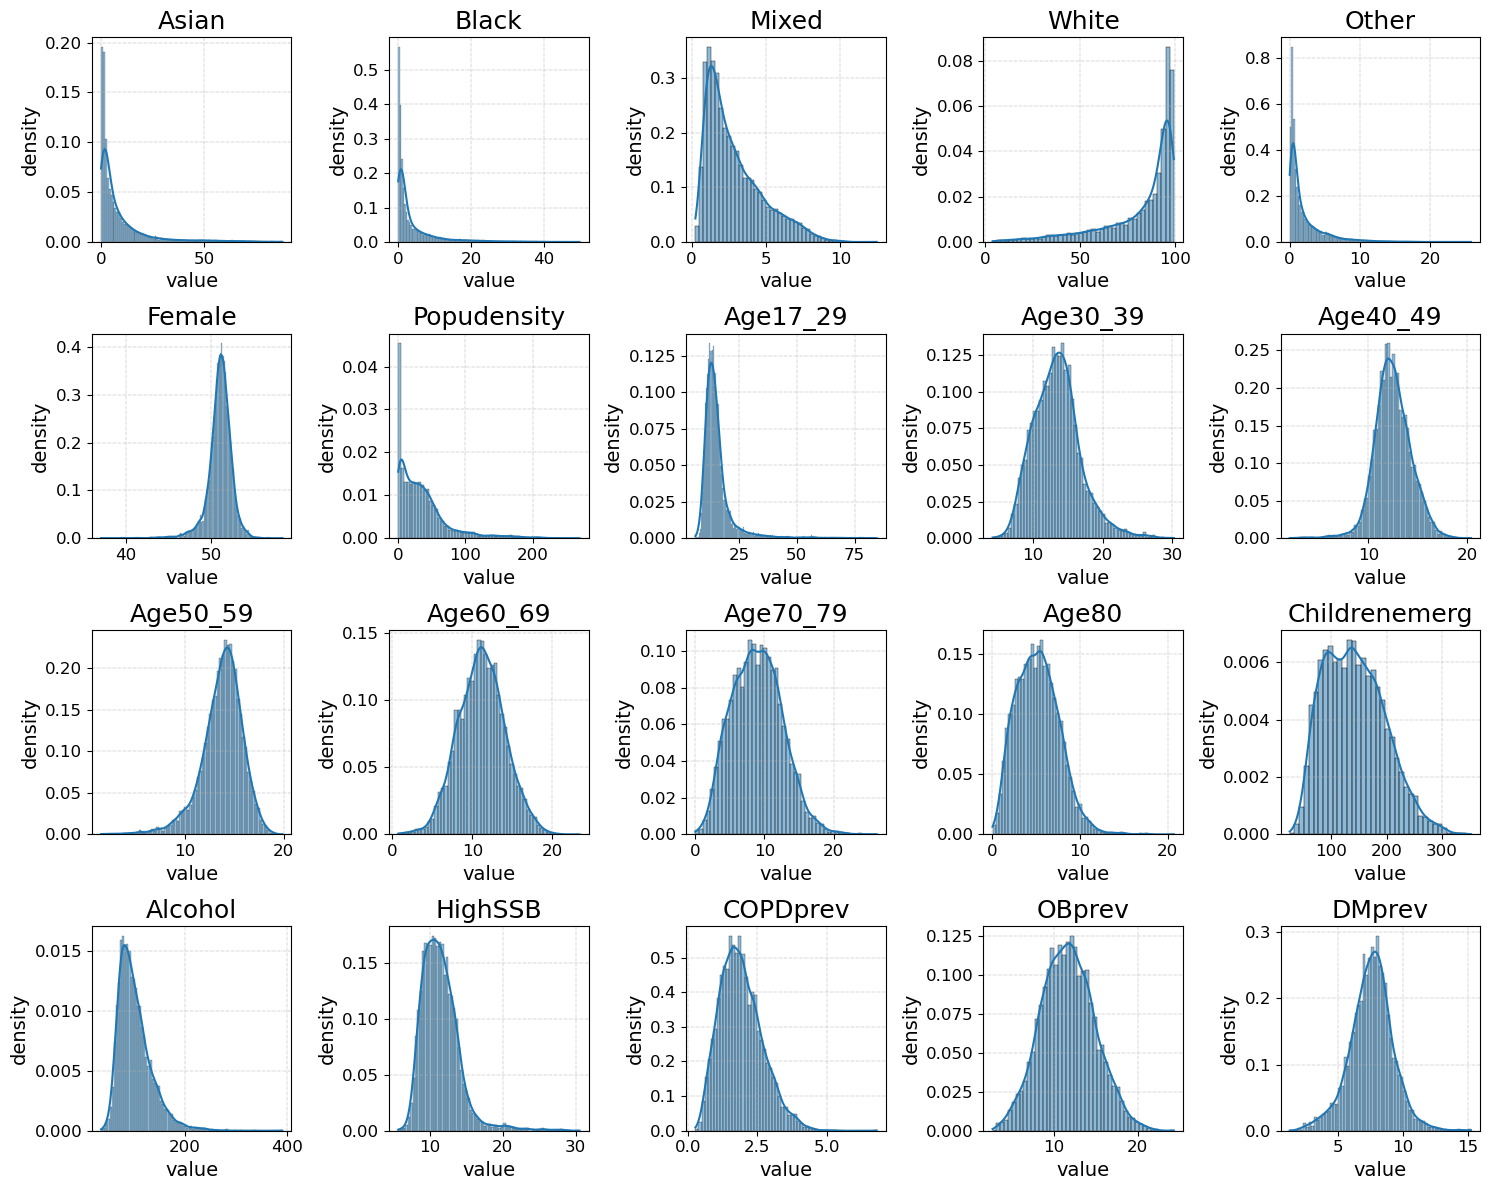

CPU times: user 16.9 s, sys: 136 ms, total: 17.1 s
Wall time: 3.25 s


In [12]:
%%time
# plot the data distribution (histogram)
# the data frame without the imddecile
df = Varshp3.iloc[:, 8:]
fig, axes = plt.subplots(4, 5, figsize=(15, 12), sharey=False)

for i, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    sns.histplot(df.iloc[:, i], kde=True, ax=ax, stat='density')
    ax.set_title(f'{col}', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=12)
    
    ax.set_xlabel('value', fontsize=14)
    ax.set_ylabel('density', fontsize=14)
    
    ax.grid(linestyle='-.', linewidth=0.35)

# fig.suptitle('histogram plots for each variable', fontsize = 18)

plt.tight_layout()
plt.show()

## QQ plot

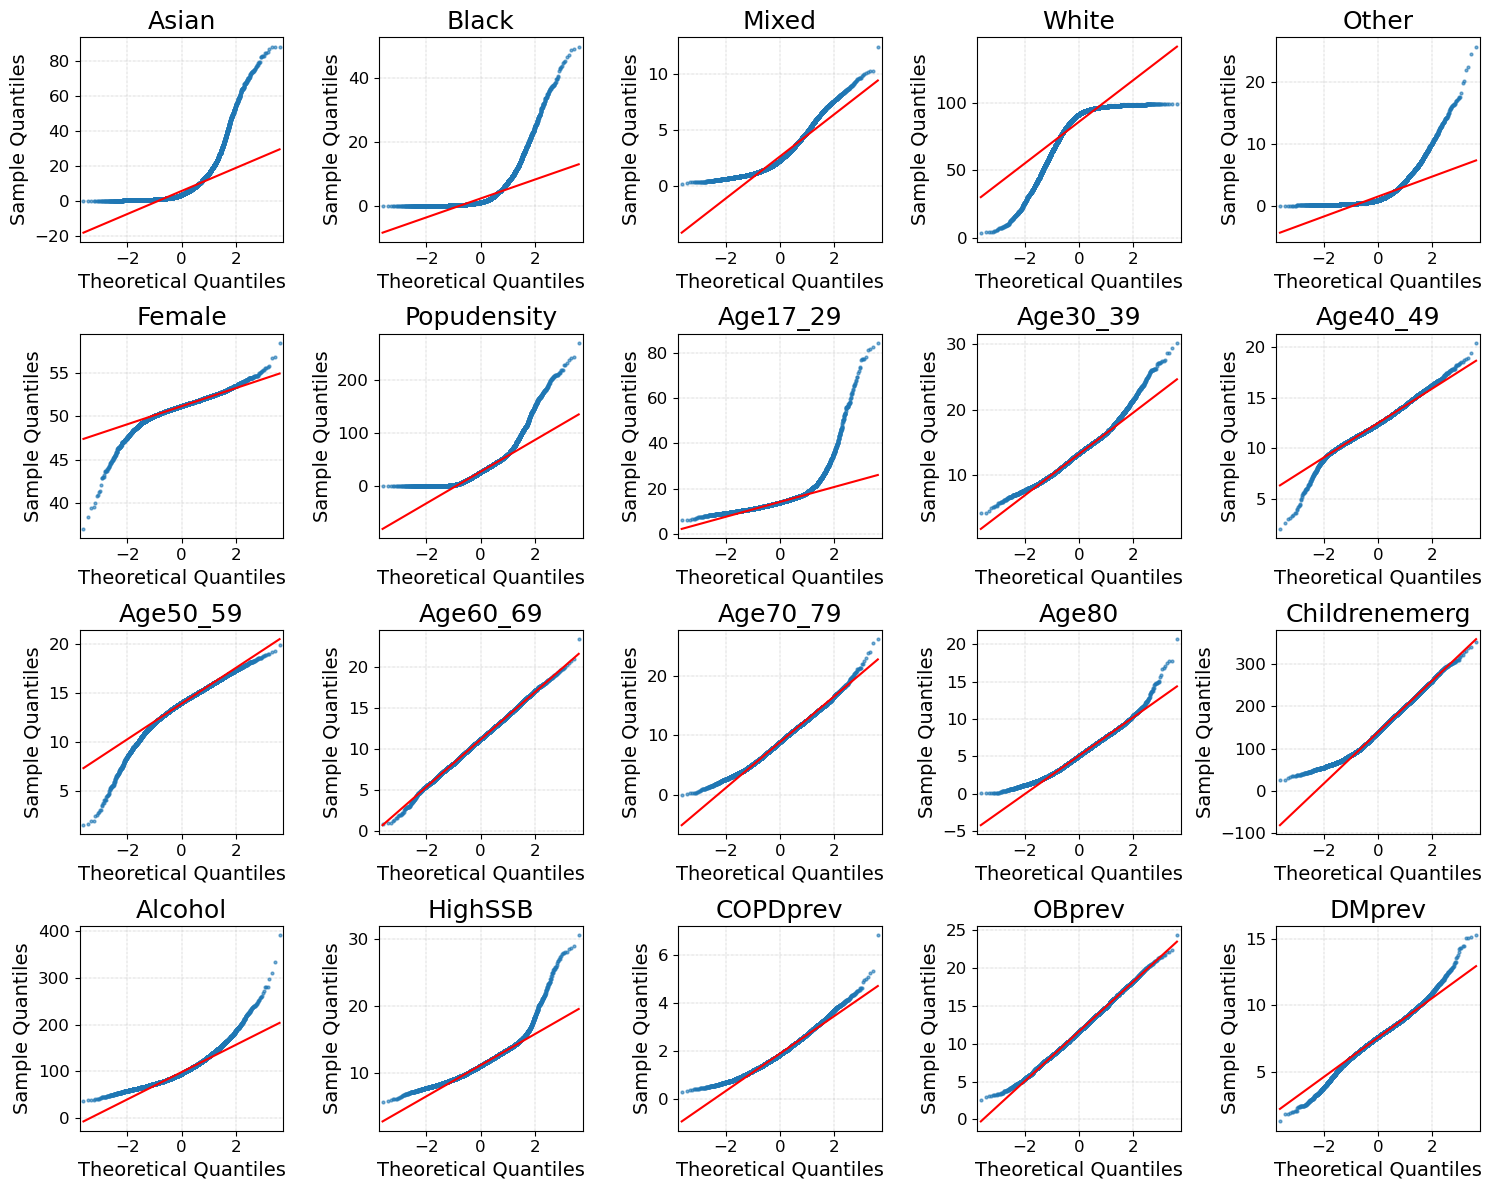

CPU times: user 1.27 s, sys: 319 ms, total: 1.58 s
Wall time: 1.08 s


In [13]:
%%time
# plot the qqplot for all variables
# plot the data distribution (histogram)
# the data frame without the IMDdecile
df = Varshp3.iloc[:, 8:]
fig, axes = plt.subplots(4, 5, figsize=(15, 12), sharey=False)

for i, (col, ax) in enumerate(zip(df.columns, axes.flatten())):
    qqplot(df[col], line='q', ax=ax, alpha=0.6, markersize=2)
    ax.set_title(f'{col}', fontsize=18)
    ax.set_xlabel('Theoretical Quantiles', fontsize=14)
    ax.set_ylabel('Sample Quantiles', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(linestyle='-.', linewidth=0.3)
    
plt.tight_layout()
plt.show()

## Transformation

In [14]:
VardataT = Varshp2.copy()

In [15]:
VardataT['Mixed'] = np.log(VardataT['Mixed'])
VardataT['Other'] = np.log(VardataT['Other'])
VardataT['HighSSB'] = np.log(VardataT['HighSSB'])
VardataT['Childrenemerg'] = np.log(VardataT['Childrenemerg'])
VardataT['Alcohol'] = np.log(VardataT['Alcohol'])
VardataT['Age17_29'] = np.log(VardataT['Age17_29'])

# Correlation

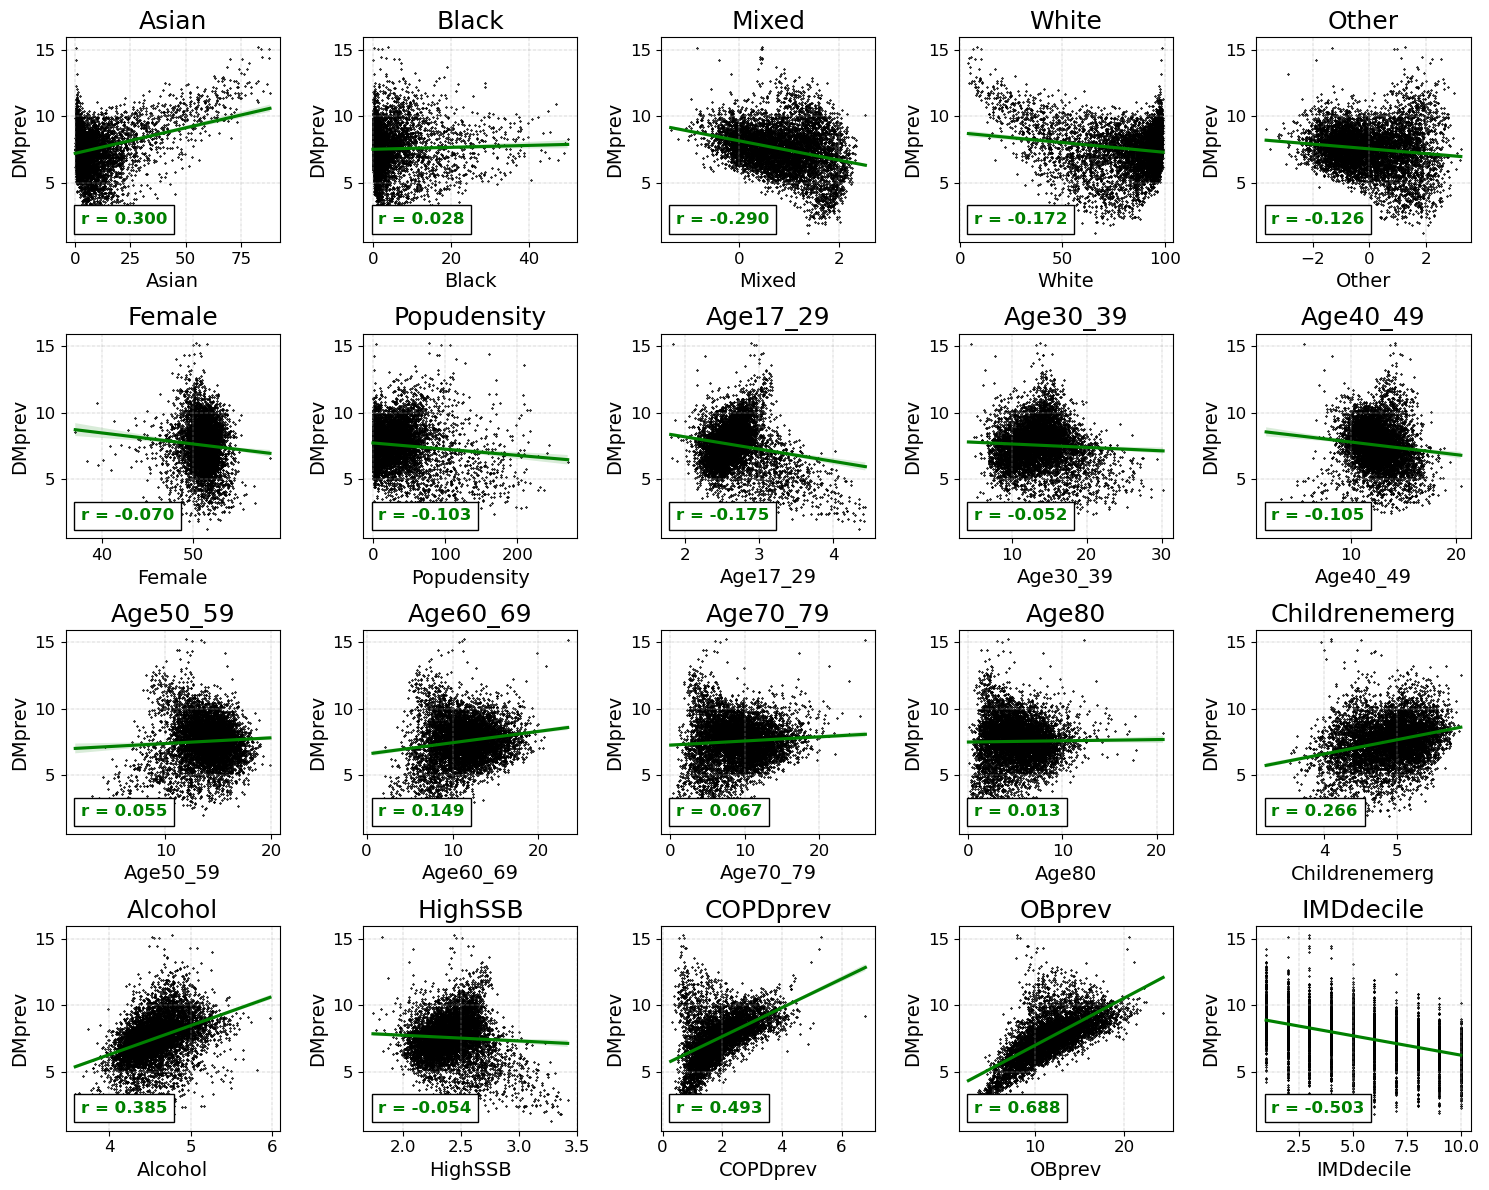

CPU times: user 29.8 s, sys: 571 ms, total: 30.4 s
Wall time: 29.9 s


In [16]:
%%time
# the dataframe after transformation
df = VardataT.iloc[:, 8:]

# make the correlation matrix
cormatrix = df.corr(method='pearson')
# record the correlation coefficient
corcoef_list = cormatrix['DMprev'].tolist()
# plot the scatter plots of explanatory variables vs response variable
fig, axes = plt.subplots(4, 5, figsize=(15, 12), sharey=False)
for i, (col, ax) in enumerate(zip(df.columns[:-1], axes.flatten())):
    sns.regplot(x = f'{col}', y = 'DMprev',
                data = df, color = 'black', marker='x', ax = ax,
                line_kws = {"color": "green"},
                scatter_kws={"s": 0.6})
    ax.set_title(f'{col}', fontsize=18)
    ax.set_xlabel(f'{col}', fontsize=14)
    ax.set_ylabel('DMprev', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.grid(linestyle='-.', linewidth=0.35)
    # adding text of pearson correlation coefficient for each plot
    ax.add_artist(AnchoredText(f"r = {corcoef_list[i]:.3f}", loc=3,
                               prop=dict(size='12', color='green', weight='bold')))

plt.tight_layout()
plt.show()

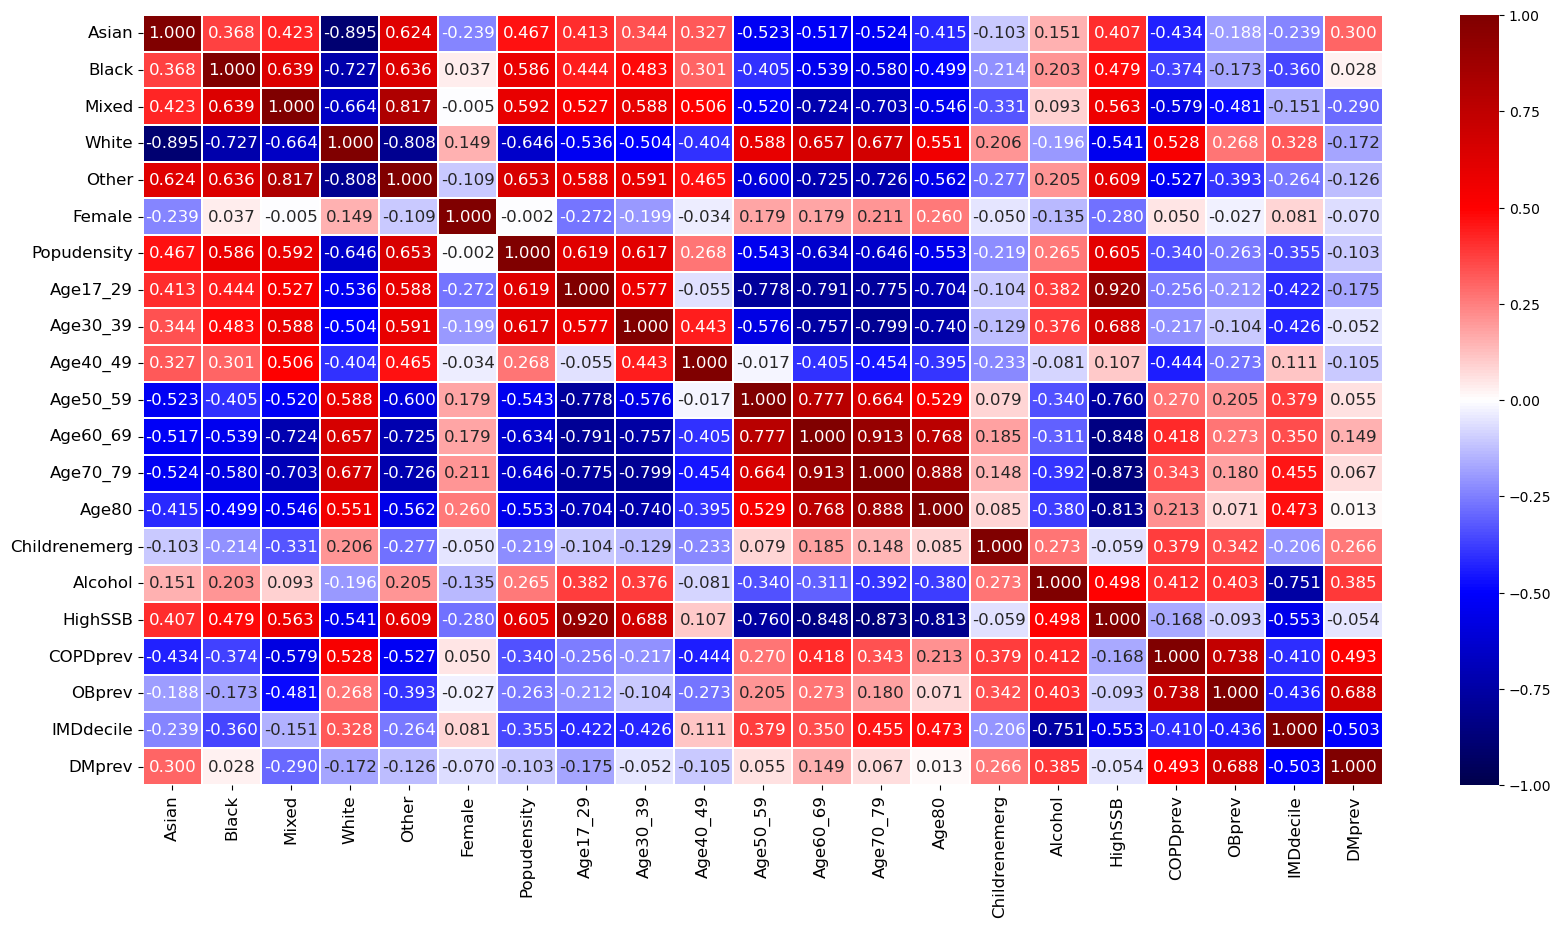

CPU times: user 1.07 s, sys: 343 ms, total: 1.41 s
Wall time: 915 ms


In [17]:
%%time   
# plot the correlation matrix plot heat map
fig, axes = plt.subplots(figsize = (20,10))
sns.heatmap(cormatrix, annot = True, fmt='.3f',
            linewidths = 0.1, annot_kws = {'size': 12},
            cmap ='seismic',
            vmin=-1, vmax=1, ax=axes)
axes.tick_params(labelsize = 12)
plt.show()